# ANNs With Keras

## The Perceptron Architecture

If the data follows a linear pattern then the Perceptron model will converge

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Only the iris setosa class

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

X_new = [[2,0.5], [3,1]]
y_pred = per_clf.predict(X_new) # Predicts true or false for these 2 flowers

The sklearn Perceptron = SGDClassifier with a constant learning rate.

## The Multilayer Perceptron(MLP) and Backpropagation

An MLP is composed of one input layer, one or more layers of Threshold Logic Units(TLUs) called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are called the lower layers and the ones close to the outputs are usually called the upper layers. <b>If the signal flows only in one direction (from the inputs to the outputs), then it is an example of a feedforward neural network(FNN).</b> <br> If an ANN contains a deep stack of hidden layers, it is called a deep neural network(DNN). 

To train MLPs you do <b>Backpropagation</b> which involves a combination of reverse-mode autodiff and gradient descent. With reverse-mode autodiff you can go through the model forward and backwords once and be able to calculate the gradient with respect to each weight and bias of the model. You can use this gradiant to tweak each the model in order to reduce the neural network's error. Repeat this enough times and the model will eventually reach a minimum. Backpropagation is the most popular training technique for Neural Networks

The 3 most common activation functions are:
1. The Sigmoid Function
2. The hyperbolic tangent function
3. The rectified linear unit function(ReLU)

## Regression MLPs

For most regression MLPs you only need one output neuron. However, for multivariate regression(i.e. to predict multiple values at once.) you need one output neuron for each output dimension. An example of multivariate regression is if you want to find the center of an object in an image, you need a 2d coordiante, therefore you need two output neurons. If you want to make a box around the object then you also need a width and a height output, now you need 4 output neurons. 

In [2]:
### Regression MLP using Sklearn ###
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [3]:
rmse

0.5053326657967985

Sklearn has simple, easy to use MLP classes and functions but has limited features. This is why Keras/Tensorflow/PyTorch is a better choice in most cases.

## Classification MLPs

MLPs can also be used for classification tasks. For binary classification you need one output layer that will spit out a 0 or 1, and will most likly use a sigmoid activation function.<br> For multilabel binary classification tasks (ex. classifiying emails as spam or ham and simultaneously predict urgent or nonurgent.) you need an output neuron for each class both using sigmoid activation functions. The first would output the probablity for span or ham, and the 2nd the probability for urgent or nonurgent. <br> For multiclass classification (ex. MNIST dataset) you would need one output neuron for each class and should use the softmax activation function for the <b>whole output layer</b>

A typical loss function for predicting probability distributions is the cross-entropy loss. 

## MLPs with Keras

### Building an image classifier using Keras Sequential API

#### Using keras to load dataset

In [4]:
import tensorflow as tf

2024-12-27 14:12:29.788838: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-27 14:12:29.932418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735330349.989859    3934 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735330350.006581    3934 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 14:12:30.147732: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train.dtype

dtype('uint8')

In [8]:
# Scale pixel intensites down to scale of 0-1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

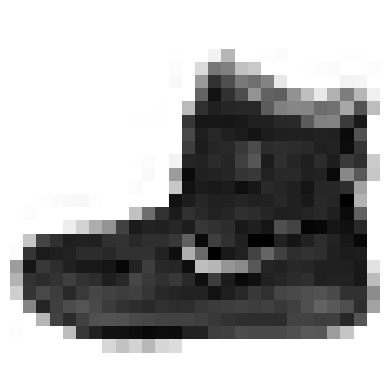

In [10]:
# extra code
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
class_names[y_train[0]]

'Ankle boot'

#### Creating the model using the sequential API

In [12]:
## Multiclass Classification MLP with two hidden layers
tf.random.set_seed(42)
# Most basic keras model type
model = tf.keras.Sequential()
# Input layer
model.add(tf.keras.layers.Input(shape=[28,28]))
# Flatten layer converts the input image(2d) into a 1d array
model.add(tf.keras.layers.Flatten())
# First Dense layer
model.add(tf.keras.layers.Dense(300, activation='relu'))
# Second Dense layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
# Output layer (Softmax activation function for multiclass classification)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

I0000 00:00:1735330352.743524    3934 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9780 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
model.summary()
# Note the None in output shape means that the batch size can be anything

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

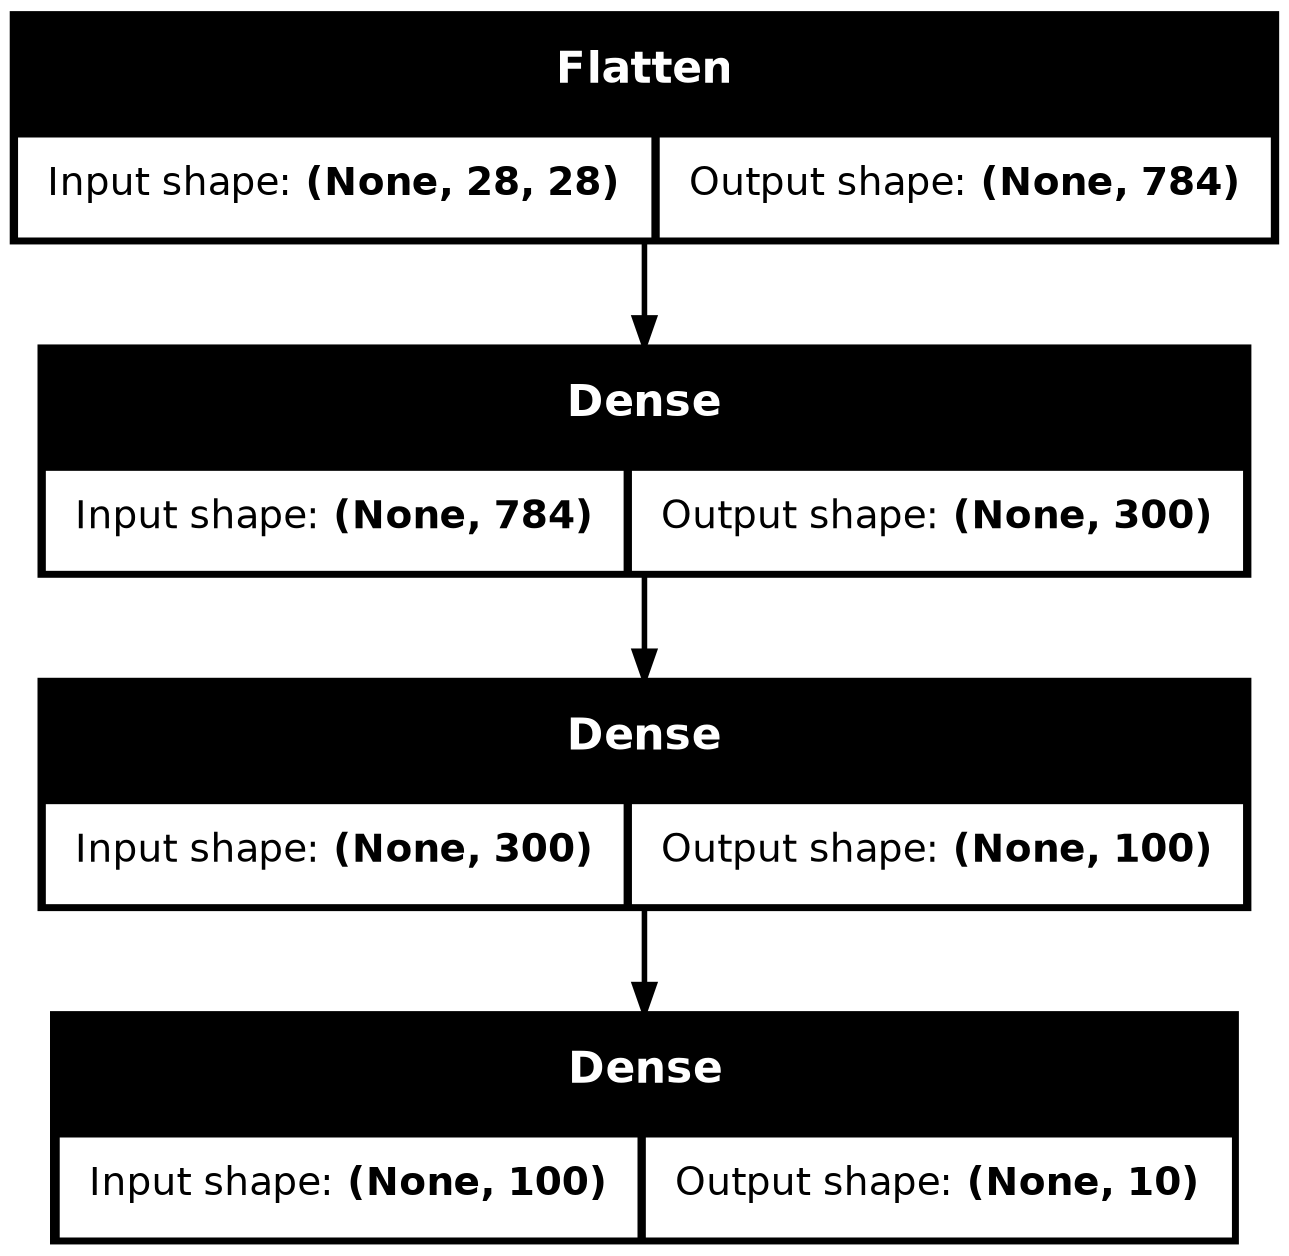

In [14]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [15]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
model.get_layer('dense') is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()
weights
# Weights should be Non 0 and should all be different in order for backpropagation to work

array([[-0.00522371,  0.01764508,  0.01549866, ...,  0.03694203,
        -0.06801098, -0.07309876],
       [-0.01640331,  0.00638187, -0.0278893 , ..., -0.04144843,
         0.01120392,  0.01167277],
       [-0.01460849,  0.05912505, -0.06152848, ...,  0.06080131,
        -0.00766315, -0.03334498],
       ...,
       [ 0.03784613,  0.03945225, -0.04918448, ...,  0.01548465,
         0.03958238, -0.01928575],
       [-0.05540912, -0.05373131, -0.04037182, ..., -0.01956551,
         0.04642498, -0.07345944],
       [ 0.02933878,  0.06160253, -0.05250075, ..., -0.06592617,
        -0.05621678,  0.04746698]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

#### Compiling the Model

In [22]:
model.compile(loss='sparse_categorical_crossentropy', ## This is used because we have sparse labels and it is multiclass classification
             optimizer='sgd', ## SGD means stochastic gradient descent. 
             metrics=['accuracy']) ## Since this is a classifier, accuracy is a simple metric to use

#### Training and Evaluating the Model

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


I0000 00:00:1735330353.919872    4055 service.cc:148] XLA service 0x78ea34005420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735330353.919990    4055 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-27 14:12:33.933249: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735330353.973809    4055 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-27 14:12:33.995120: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.3 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-12-27 14:12:3

 192/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.4474 - loss: 1.7475

I0000 00:00:1735330356.377639    4055 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1698/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6836 - loss: 0.9969

2024-12-27 14:12:38.494829: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_38', 460 bytes spill stores, 496 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6846 - loss: 0.9935  

2024-12-27 14:12:41.455922: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 276 bytes spill stores, 332 bytes spill loads



1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6847 - loss: 0.9933 - val_accuracy: 0.8294 - val_loss: 0.5015
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.8275 - loss: 0.5042 - val_accuracy: 0.8410 - val_loss: 0.4542
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8430 - loss: 0.4524 - val_accuracy: 0.8468 - val_loss: 0.4319
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.8523 - loss: 0.4228 - val_accuracy: 0.8524 - val_loss: 0.4161
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8590 - loss: 0.4015 - val_accuracy: 0.8544 - val_loss: 0.4031
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8643 - loss: 0.3845 - val_accuracy: 0.8560 - val_loss: 0.3937
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.8685 - loss: 0.3703 - val_accuracy: 0.8588 - val_loss: 0.3866
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8728 - loss: 0.3581

If performance on training data is much better than the performance on validation data then either the model is overfitting, or there is a bug, such as a data mismatch between the training and validation data

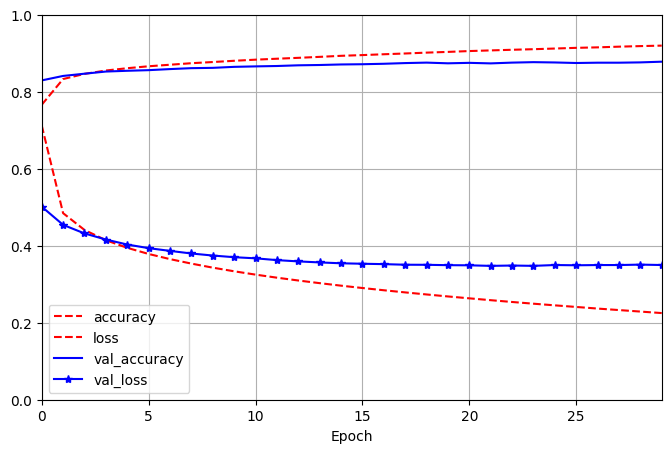

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0, 29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=['r--', 'r--', 'b-', 'b-*'])
plt.show()

In [25]:
model.evaluate(X_test, y_test)

305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.8743 - loss: 0.3680

2024-12-27 14:13:27.893972: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 292 bytes spill stores, 360 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8743 - loss: 0.3679


[0.3652370572090149, 0.8737000226974487]

#### Using the Model to make predictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2024-12-27 14:13:29.010576: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17', 276 bytes spill stores, 332 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.02, 0.  , 0.75],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
# If you only want the predicted class not the probablities then use argmax()
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP using the Sequential API

In [29]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [30]:
# Very similar process to Classifer with Sequential API
tf.random.set_seed(42)
## Normalization layer does the same thing as Sklearns StandardScaler
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) 
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=[tf.metrics.RootMeanSquaredError])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20


/home/dude/Desktop/env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.6779 - root_mean_squared_error: 1.2468 - val_loss: 0.3782 - val_root_mean_squared_error: 0.6149
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4008 - root_mean_squared_error: 0.6328 - val_loss: 0.6542 - val_root_mean_squared_error: 0.8088
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3636 - root_mean_squared_error: 0.6028 - val_loss: 0.6243 - val_root_mean_squared_error: 0.7901
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3506 - root_mean_squared_error: 0.5920 - val_loss: 0.5293 - val_root_mean_squared_error: 0.7276
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3406 - root_mean_squared_error: 0.5834 - val_loss: 0.5524 - val_root_mean_squared_error: 0.7433
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3318 - root_mean_squared_error: 0.5759 - val_loss: 0.9241 - val_root_mean_squared_error: 0.9613
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3

array([[0.4647627 ],
       [0.98089117],
       [4.9577417 ]], dtype=float32)

### Building Complex Models Using the Functional API

In [31]:
## Based on the wide & deep neural network
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
### Use this model just like the sequential ones before ###

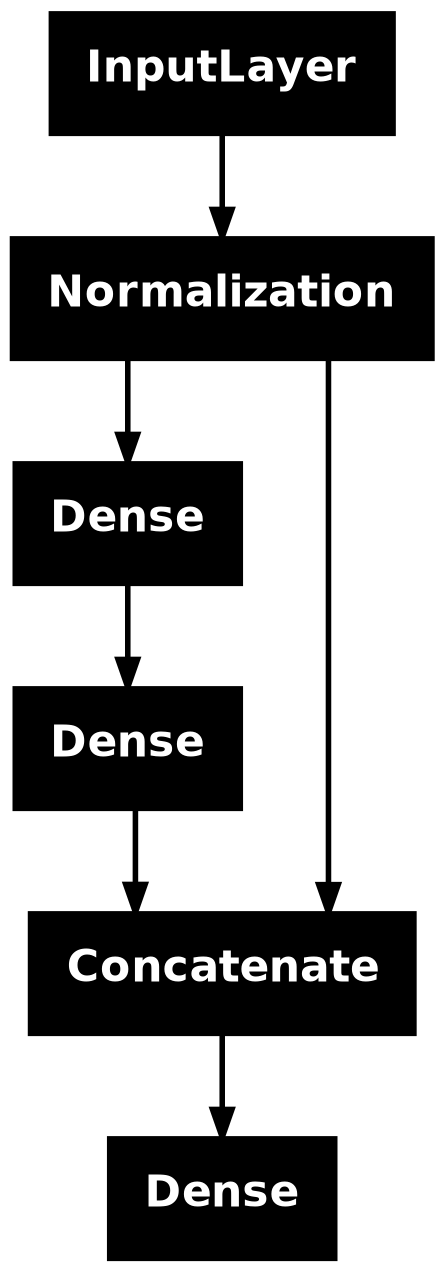

In [32]:
## Deep part on the left and Wide part on the right
tf.keras.utils.plot_model(model)

In [33]:
## Same deep and wide archtechture but with different features going through different parts
input_wide = tf.keras.layers.Input(shape=[5], name='input_wide') # Features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name='input_deep') # Features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

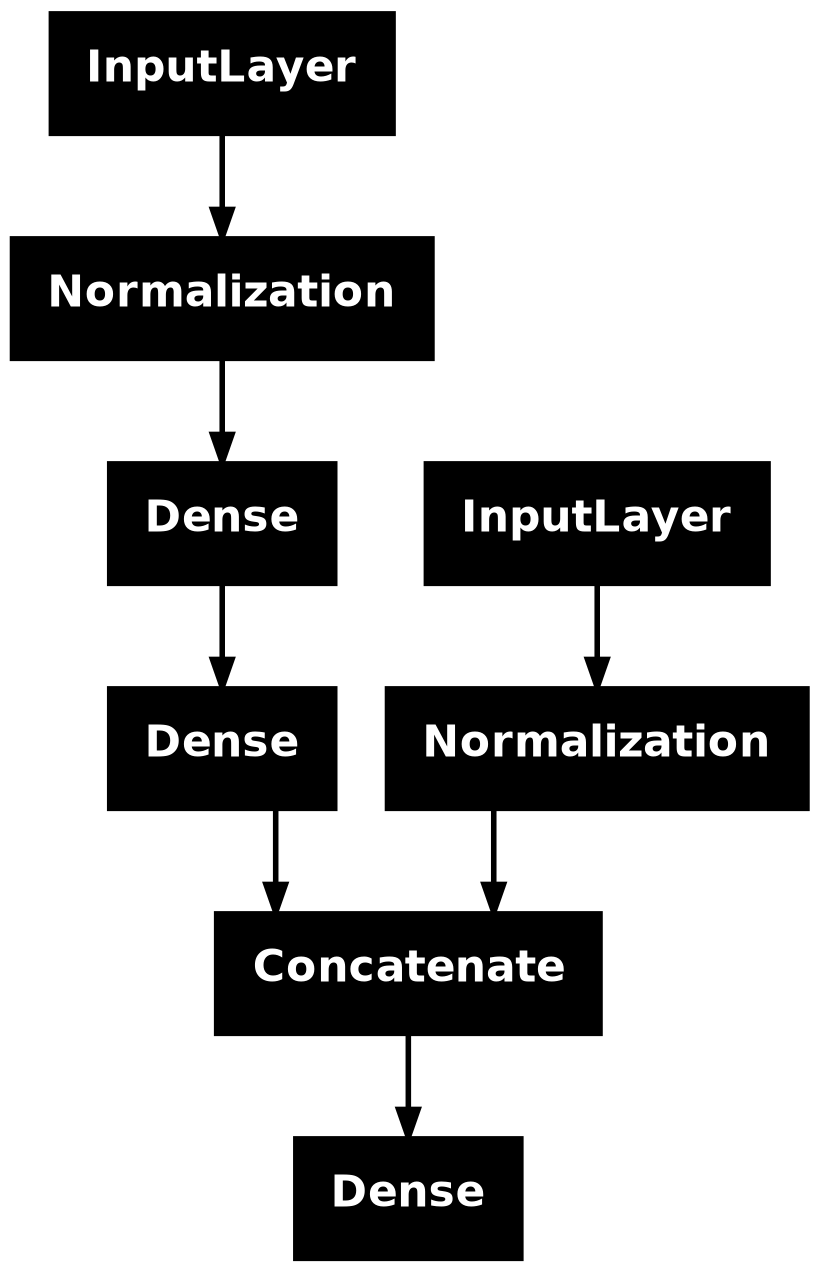

In [34]:
tf.keras.utils.plot_model(model)

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
# Can also pass a dictionary to not have order become a problem {'input_wide':X_train_wide, 'input_deep':X_train_deep} names need to be same
history = model.fit({'input_wide':X_train_wide, 'input_deep':X_train_deep}, y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.5178 - loss: 2.3872 - val_RootMeanSquaredError: 0.8034 - val_loss: 0.6455
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7838 - loss: 0.6154 - val_RootMeanSquaredError: 0.7655 - val_loss: 0.5860
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6890 - loss: 0.4749 - val_RootMeanSquaredError: 0.6276 - val_loss: 0.3938
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6498 - loss: 0.4225 - val_RootMeanSquaredError: 0.6002 - val_loss: 0.3602
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6331 - loss: 0.4010 - val_RootMeanSquaredError: 0.6840 - val_loss: 0.4678
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6227 - loss: 0.3879 - val_RootMeanSquaredError: 0.6271 - val_loss: 0.3932
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6147 - los

In [36]:
# Adding an auxiliary output on the model
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [37]:
## Since you have two outputs each one will need its own loss function.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), # could also use a dictionary like with the inputs  
              loss_weights=(0.9,0.1), # Spilt the weights because we mainly care about main output. (The aux output is for regularization)
              optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [38]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - dense_13_RootMeanSquaredError: 0.8330 - dense_13_loss: 0.7082 - dense_14_RootMeanSquaredError: 2.0496 - dense_14_loss: 4.4909 - loss: 1.0864 - val_dense_13_RootMeanSquaredError: 0.8652 - val_dense_13_loss: 0.7483 - val_dense_14_RootMeanSquaredError: 1.0560 - val_dense_14_loss: 1.1147 - val_loss: 0.7852
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_13_RootMeanSquaredError: 0.6224 - dense_13_loss: 0.3876 - dense_14_RootMeanSquaredError: 0.8157 - dense_14_loss: 0.6658 - loss: 0.4155 - val_dense_13_RootMeanSquaredError: 0.6065 - val_dense_13_loss: 0.3678 - val_dense_14_RootMeanSquaredError: 0.7731 - val_dense_14_loss: 0.5976 - val_loss: 0.3909
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_13_RootMeanSquaredError: 0.6045 - dense_13_loss: 0.3657 - dense_14_RootMeanSquaredError: 0.7495 - dense_14_loss: 0.5619 - loss: 0.3853 - val_dense_13_RootMeanSquaredError: 0.6065 - val_dense_13_loss: 0.3678 - val_dense_14_Ro

In [39]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_13_RootMeanSquaredError: 0.5703 - dense_13_loss: 0.3254 - dense_14_RootMeanSquaredError: 0.6197 - dense_14_loss: 0.3841 - loss: 0.3312 


The Sequential and Functional APIs in Keras are good for a number of reasons.<br>
1. The models can easily be saved, cloned, and shared.
2. Its structure can be displayed and analyzed
3. The framework can infer shapes and check types which means errors can be caught early.
4. Easier to debug.

### Using the Subclassing API to Build Dynamic Models

Subclassing should be used if the model you want to build not static and has features that called be implemented in the other two methods like loops, varying shapes, conditional branching, and other dynamic behaviors.

In [40]:
## Wide and Deep using subclassing
class WideAndDeepModel(tf.keras.Model):
    
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # Let original __init__ handle special parameters
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


model = WideAndDeepModel(30, activation='relu', name='my_cool_model')

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - RootMeanSquaredError: 1.6934 - RootMeanSquaredError_1: 2.2699 - loss: 3.2307 - mse_loss: 5.2514 - val_RootMeanSquaredError: 0.8243 - val_RootMeanSquaredError_1: 1.2161 - val_loss: 0.7594 - val_mse_loss: 1.4785
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7677 - RootMeanSquaredError_1: 1.0018 - loss: 0.6323 - mse_loss: 1.0059 - val_RootMeanSquaredError: 0.8072 - val_RootMeanSquaredError_1: 0.9154 - val_loss: 0.6702 - val_mse_loss: 0.8378
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6764 - RootMeanSquaredError_1: 0.8289 - loss: 0.4807 - mse_loss: 0.6874 - val_RootMeanSquaredError: 1.0240 - val_RootMeanSquaredError_1: 0.7581 - val_loss: 1.0011 - val_mse_loss: 0.5747
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6487 - RootMeanSquaredError_1: 0.7717 - loss: 0.4384 - mse_loss: 0.5957 - val_RootMeanSquaredError: 1.1901 - val_RootMeanSquaredEr

In the call() methodyou can do anything you want (for loops, if statements, low-level stuff). The problem is you can't use keras features like graphing the model and saving the model. You need to find other ways to do this.

In [42]:
model.save('my_keras_model.keras')

In [43]:
# model = tf.keras.models.load_model('my_keras_model.keras')

### Using Callbacks

#### Checkpoint Callback

In [44]:
# Checkpoint callback saves checkpoints of the model at regular intervals during training
### Use best_only=True if you want only the best model on the validation data This way you dont need to worry about overfitting/overtraining
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6000 - RootMeanSquaredError_1: 0.6741 - loss: 0.3696 - mse_loss: 0.4545 - val_RootMeanSquaredError: 1.0796 - val_RootMeanSquaredError_1: 0.8059 - val_loss: 1.1139 - val_mse_loss: 0.6493
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5953 - RootMeanSquaredError_1: 0.6644 - loss: 0.3632 - mse_loss: 0.4415 - val_RootMeanSquaredError: 1.1572 - val_RootMeanSquaredError_1: 0.7498 - val_loss: 1.2615 - val_mse_loss: 0.5620
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5933 - RootMeanSquaredError_1: 0.6549 - loss: 0.3597 - mse_loss: 0.4289 - val_RootMeanSquaredError: 1.2749 - val_RootMeanSquaredError_1: 0.7640 - val_loss: 1.5211 - val_mse_loss: 0.5835
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5914 - RootMeanSquaredError_1: 0.6506 - loss: 0.3572 - mse_loss: 0.4233 - val_RootMeanSquaredError: 1.5627 - val_RootMeanSquaredEr

#### Early Stopping

In [45]:
## Early stopping will interupt training when there is no progress or performance is decreasing.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5727 - RootMeanSquaredError_1: 0.6204 - loss: 0.3338 - mse_loss: 0.3850 - val_RootMeanSquaredError: 1.1313 - val_RootMeanSquaredError_1: 0.7569 - val_loss: 1.2091 - val_mse_loss: 0.5727
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5730 - RootMeanSquaredError_1: 0.6202 - loss: 0.3341 - mse_loss: 0.3848 - val_RootMeanSquaredError: 1.0861 - val_RootMeanSquaredError_1: 0.8566 - val_loss: 1.1351 - val_mse_loss: 0.7336
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5693 - RootMeanSquaredError_1: 0.6158 - loss: 0.3297 - mse_loss: 0.3793 - val_RootMeanSquaredError: 0.9155 - val_RootMeanSquaredError_1: 0.6514 - val_loss: 0.7968 - val_mse_loss: 0.4243
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.5683 - RootMeanSquaredError_1: 0.6151 - loss: 0.3286 - mse_loss: 0.3785 - val_RootMeanSquaredError: 1.0013 - val_RootMeanSquar

Other callbacks: keras.io/api/callbacks

#### Custom Callbacks

In [46]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [47]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.63
Epoch=1, val/train=1.59
Epoch=2, val/train=2.08
Epoch=3, val/train=1.51
Epoch=4, val/train=2.26
Epoch=5, val/train=1.60
Epoch=6, val/train=1.65
Epoch=7, val/train=1.20
Epoch=8, val/train=1.57
Epoch=9, val/train=1.34


### Tensorboard

In [48]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [49]:
# extra code – builds the first regression model we used earlier
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=2e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

/home/dude/Desktop/env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

2024-12-27 14:14:53.909558: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-12-27 14:14:53.909577: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-12-27 14:14:53.909596: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1006] Profiler found 1 GPUs
2024-12-27 14:14:53.909925: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:153] cuptiGetTimestamp: error 999: 
2024-12-27 14:14:53.909936: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:206] cuptiSubscribe: ignored due to a previous error.
2024-12-27 14:14:53.909943: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:243] cuptiGetResultString: ignored due to a previous error.
2024-12-27 14:14:53.909948: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1112] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

Epoch 1/20
200/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 1.9471 - loss: 3.8625

2024-12-27 14:14:55.061544: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-12-27 14:14:55.061565: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-12-27 14:14:55.061576: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:151] cuptiGetTimestamp: ignored due to a previous error.
2024-12-27 14:14:55.061580: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:206] cuptiSubscribe: ignored due to a previous error.
2024-12-27 14:14:55.061583: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:243] cuptiGetResultString: ignored due to a previous error.
2024-12-27 14:14:55.061586: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1112] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2024-12-27 14:14:55.195982: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] 

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 1.7460 - loss: 3.1391 - val_RootMeanSquaredError: 0.9510 - val_loss: 0.9043
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8618 - loss: 0.7441 - val_RootMeanSquaredError: 0.7792 - val_loss: 0.6071
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7826 - loss: 0.6133 - val_RootMeanSquaredError: 0.7373 - val_loss: 0.5437
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7433 - loss: 0.5532 - val_RootMeanSquaredError: 0.7103 - val_loss: 0.5046
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.7136 - loss: 0.5097 - val_RootMeanSquaredError: 0.6624 - val_loss: 0.4387
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6909 - loss: 0.4779 - val_RootMeanSquaredError: 0.6436 - val_loss: 0.4142
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.6738 - loss: 0.4544 -

### Fine-Tuning Neural Network Hyperparameters

In [71]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [72]:
import keras_tuner as kt

In [73]:
def build_model(hp: kt.HyperParameters):
    ## Define hyperparameters
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=2e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    ## Build model using hyperparameters 
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

    return model

In [74]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory='my_fashion_mnist', project_name='my_rnd_search', seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 21s]
val_accuracy: 0.8252000212669373

Best val_accuracy So Far: 0.8546000123023987
Total elapsed time: 00h 01m 44s


In [75]:
top3_models = random_search_tuner.get_best_models(num_models=3)
top3_models

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>,
 <Sequential name=sequential, built=True>]

In [76]:
best_model = top3_models[0]

In [77]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params

In [78]:
top3_params[0].values # Best Hyperparameters

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.001825272058205421,
 'optimizer': 'sgd'}

In [79]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.001825272058205421
optimizer: sgd
Score: 0.8546000123023987


In [82]:
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.9018 - loss: 0.2645
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9034 - loss: 0.2595
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9058 - loss: 0.2529
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9066 - loss: 0.2487
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9088 - loss: 0.2443
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9096 - loss: 0.2406
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.9108 - loss: 0.2370
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9122 - loss: 0.2332
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9140 - loss: 0.2289
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.9155 - loss: 0.2254


In [83]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.8628 - loss: 0.4156


In [85]:
"""
In order to tune data preproccesing hyperparameters, or model.fit() parameters, you should use this approach
"""

class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X,y, **kwargs)

In [86]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [87]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 30s]
val_accuracy: 0.6395999789237976

Best val_accuracy So Far: 0.8709999918937683
Total elapsed time: 00h 13m 11s


# Exercise 10

Task: Build an Deep MLP on the mnist dataset and try to get 98% accuracy

In [109]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 
X_val = X_train[:10_000]
y_val = y_train[:10_000]
X_train = X_train[10_000:]
y_train = y_train[10_000:]

In [118]:
## First try with basic Sequential model
model = tf.keras.Sequential()

# Input layer
model.add(tf.keras.layers.InputLayer(shape=X_train.shape[1:]))
# Flatten Layer
model.add(tf.keras.layers.Flatten())
# Hidden layers
model.add(tf.keras.layers.Dense(784, activation='relu'))
model.add(tf.keras.layers.Dense(392, activation='relu'))
model.add(tf.keras.layers.Dense(196, activation='relu'))
model.add(tf.keras.layers.Dense(98, activation='relu'))
# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,020,484 (3.89 MB)

 Trainable params: 1,020,484 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
import datetime

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

log_dir = "logs/mnist_clf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, batch_size=128, epochs=250, validation_data=(X_val, y_val), 
         callbacks=[earlystop, tensorboard_callback])

Epoch 1/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0881 - val_accuracy: 0.9677 - val_loss: 0.1192
Epoch 2/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0876 - val_accuracy: 0.9678 - val_loss: 0.1189
Epoch 3/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0871 - val_accuracy: 0.9679 - val_loss: 0.1185
Epoch 4/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0865 - val_accuracy: 0.9680 - val_loss: 0.1182
Epoch 5/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0860 - val_accuracy: 0.9682 - val_loss: 0.1178
Epoch 6/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0855 - val_accuracy: 0.9682 - val_loss: 0.1175
Epoch 7/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0850 - val_accuracy: 0.9682 - val_loss: 0.1171
Epoch 8/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0845 - val_accu

In [127]:
## 2nd try with the wide and deep architecture
# Input Layer
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
flatten = tf.keras.layers.Flatten()(input_)

# Hidden Deep part
hidden1 = tf.keras.layers.Dense(784, activation='relu')(flatten)
hidden2 = tf.keras.layers.Dense(392, activation='relu')(hidden1)
hidden3 = tf.keras.layers.Dense(196, activation='relu')(hidden2)
hidden4 = tf.keras.layers.Dense(98, activation='relu')(hidden3)

# Concat layer
concat = tf.keras.layers.concatenate([hidden4, flatten])

# Output layer
output_ = tf.keras.layers.Dense(10, activation='softmax')(concat)

# Final model 
model = tf.keras.Model(inputs=[input_], outputs=[output_])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

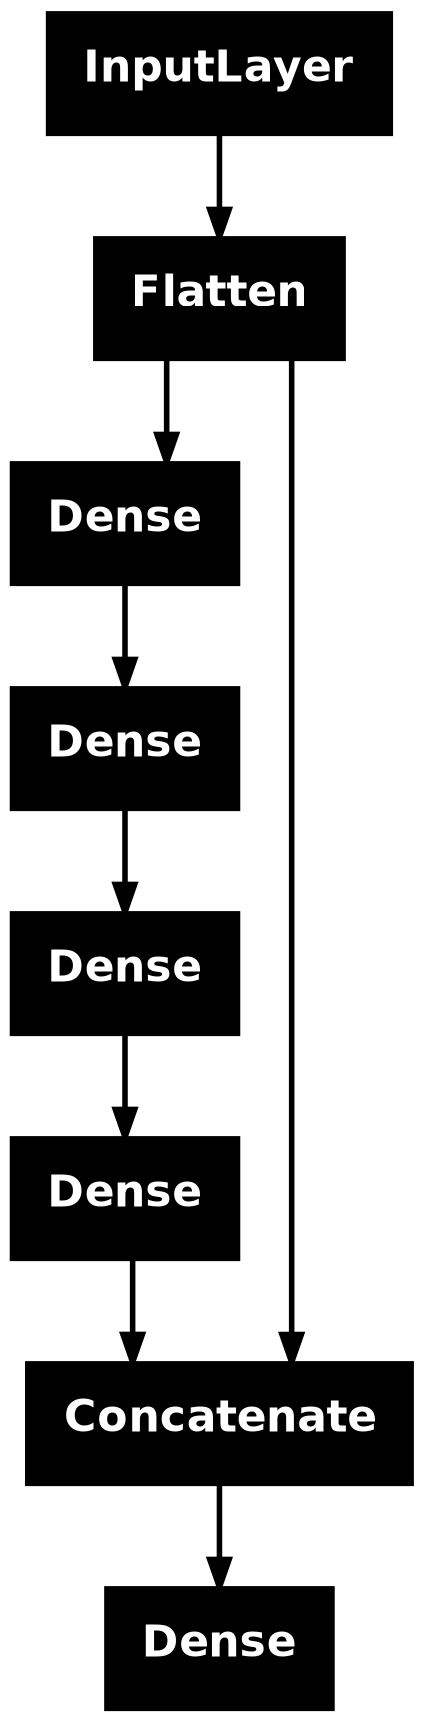

In [129]:
tf.keras.utils.plot_model(model)

In [131]:
import datetime

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

log_dir = "logs/mnist_clf/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(X_train, y_train, batch_size=128, epochs=250, validation_data=(X_val, y_val), 
         callbacks=[earlystop, tensorboard_callback])

Epoch 1/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0998 - val_accuracy: 0.9618 - val_loss: 0.1311
Epoch 2/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0993 - val_accuracy: 0.9617 - val_loss: 0.1308
Epoch 3/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.0988 - val_accuracy: 0.9617 - val_loss: 0.1304
Epoch 4/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0983 - val_accuracy: 0.9620 - val_loss: 0.1301
Epoch 5/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0978 - val_accuracy: 0.9622 - val_loss: 0.1298
Epoch 6/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0973 - val_accuracy: 0.9620 - val_loss: 0.1295
Epoch 7/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0967 - val_accuracy: 0.9621 - val_loss: 0.1291
Epoch 8/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0962 - val_accu